## Cars Data: Classification Analysis
Predicting price of Car's price class

### Loading Libraries


In [1]:
#pip install auto-sklearn

In [2]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import * 
import seaborn as sns

# importing scipy
from scipy.stats import chi2_contingency

### Loading the df Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [4]:
# Reading the df Dataset
df = pd.read_csv('cars.csv')

### Descriptive Analytics


In [5]:
# first five rows
df.head()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170


In [6]:
# Doors Distribution
df.doors.value_counts()

5    674
3    622
4    138
2      2
Name: doors, dtype: int64

In [7]:
# Removing 2 door df 
df = df.query('doors > 2')

In [8]:
# Doors Distribution
df.doors.value_counts()

5    674
3    622
4    138
Name: doors, dtype: int64

In [9]:
# last few rows
df.tail()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
1431,7500,69,20544,Petrol,86,1,Blue,0,1300,3,69,1025
1432,10845,72,19000,Petrol,86,0,Grey,0,1300,3,69,1015
1433,8500,71,17016,Petrol,86,0,Blue,0,1300,3,69,1015
1434,7250,70,16916,Petrol,86,1,Grey,0,1300,3,69,1015
1435,6950,76,1,Petrol,110,0,Green,0,1600,5,19,1114


In [10]:
# dataset infor
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           1434 non-null   int64 
 1   age             1434 non-null   int64 
 2   km              1434 non-null   int64 
 3   fuel_type       1434 non-null   object
 4   hp              1434 non-null   int64 
 5   metallic_color  1434 non-null   int64 
 6   color           1434 non-null   object
 7   automatic       1434 non-null   int64 
 8   cc              1434 non-null   int64 
 9   doors           1434 non-null   int64 
 10  tax             1434 non-null   int64 
 11  weight          1434 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 145.6+ KB


In [11]:
# Unique Values
df.nunique()

price              236
age                 77
km                1262
fuel_type            3
hp                  11
metallic_color       2
color               10
automatic            2
cc                  13
doors                3
tax                 13
weight              59
dtype: int64

In [12]:
# describe for summary stats
df.describe()

,price,age,km,hp,metallic_color,automatic,cc,doors,tax,weight
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,10734.493724,55.930265,68476.022315,101.532775,0.675035,0.055788,1576.753835,4.036262,87.101813,1072.470014
std,3628.157569,18.607171,37484.964817,14.966978,0.468525,0.229592,424.472672,0.950305,41.036562,52.643975
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63297.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,283.000000,1615.000000


In [13]:
# changing to categorical
df.metallic_color = df.metallic_color.astype('category')

In [14]:
# Change price to categorical
df.price = np.where(df.price > 9900, 'high', 'low')

In [15]:
# Frequency
df.price.value_counts()

low     727
high    707
Name: price, dtype: int64

In [16]:



# Car info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           1434 non-null   object  
 1   age             1434 non-null   int64   
 2   km              1434 non-null   int64   
 3   fuel_type       1434 non-null   object  
 4   hp              1434 non-null   int64   
 5   metallic_color  1434 non-null   category
 6   color           1434 non-null   object  
 7   automatic       1434 non-null   int64   
 8   cc              1434 non-null   int64   
 9   doors           1434 non-null   int64   
 10  tax             1434 non-null   int64   
 11  weight          1434 non-null   int64   
dtypes: category(1), int64(8), object(3)
memory usage: 136.0+ KB


In [17]:
# changing to categorical
df.automatic = df.automatic.astype('category')

In [18]:
# changing to categorical
df.doors = df.doors.astype('category')

In [19]:
# changing to categorical
df.cc = df.cc.astype('category')


In [20]:
# Car info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           1434 non-null   object  
 1   age             1434 non-null   int64   
 2   km              1434 non-null   int64   
 3   fuel_type       1434 non-null   object  
 4   hp              1434 non-null   int64   
 5   metallic_color  1434 non-null   category
 6   color           1434 non-null   object  
 7   automatic       1434 non-null   category
 8   cc              1434 non-null   category
 9   doors           1434 non-null   category
 10  tax             1434 non-null   int64   
 11  weight          1434 non-null   int64   
dtypes: category(4), int64(5), object(3)
memory usage: 107.4+ KB


## Graphical Summaries

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


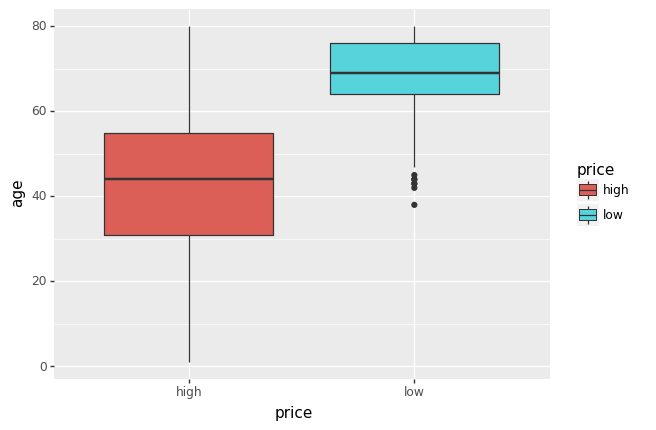

<ggplot: (8774724704365)>

In [21]:
# Boxplot of age vs price
ggplot(df,aes(x = 'price', y = 'age', fill = 'price' )) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


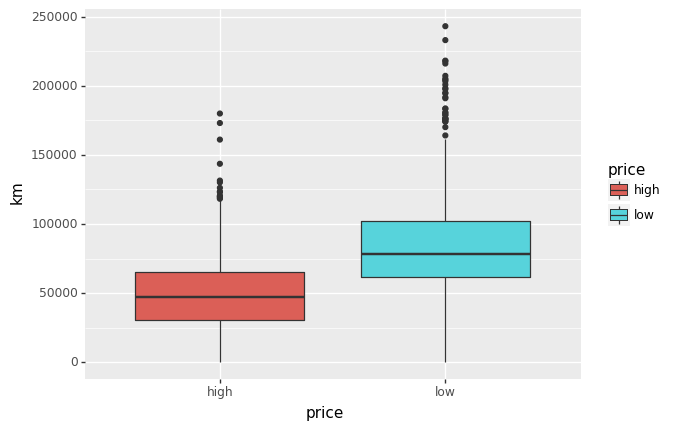

<ggplot: (8774721967045)>

In [22]:
# Boxplot of km vs price
ggplot(df,aes(x = 'price', y = 'km', fill = 'price' )) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


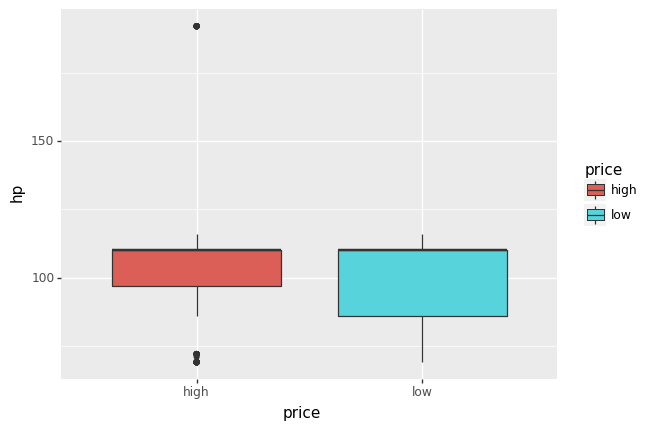

<ggplot: (8774721966961)>

In [23]:
# Boxplot of hp vs price
ggplot(df,aes(x = 'price', y = 'hp', fill = 'price' )) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


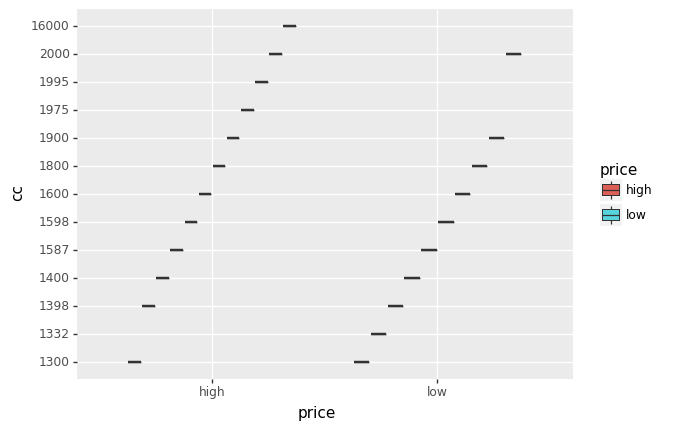

<ggplot: (8774721674833)>

In [24]:
# Boxplot of cc vs price
ggplot(df,aes(x = 'price', y = 'cc', fill = 'price' )) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


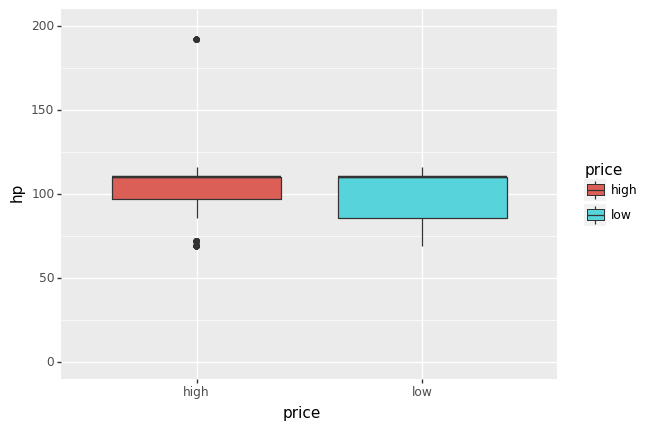

<ggplot: (8774721496769)>

In [25]:
# Boxplot of hp vs price
ggplot(df, aes(x = 'price', y = 'hp', fill = 'price')) + geom_boxplot() + ylim(0 , 200)

In [26]:
# correlation matrix
df.corr()

,age,km,hp,tax,weight
age,1.000000,0.505304,-0.155499,-0.199860,-0.470788
km,0.505304,1.000000,-0.331782,0.276556,-0.029482
hp,-0.155499,-0.331782,1.000000,-0.297830,0.090103
tax,-0.199860,0.276556,-0.297830,1.000000,0.625771
weight,-0.470788,-0.029482,0.090103,0.625771,1.000000


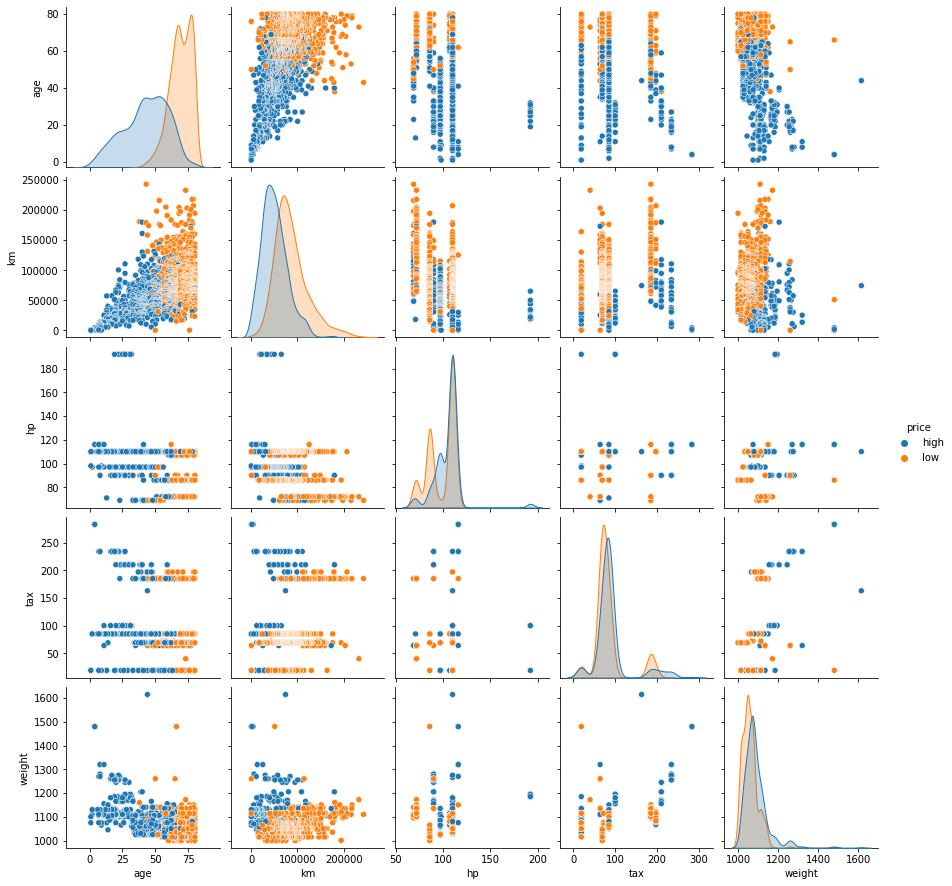

In [27]:
# scatterplot matrix
sns.pairplot(df, diag_kind= 'kde', hue = 'price')

In [28]:
# chi Square test
for col in ['fuel_type', 'metallic_color', 'automatic', 'doors']: 
  crosstab = pd.crosstab(df[col], df['price'], margins = True)
  stat, p_value, dof, expected = chi2_contingency(crosstab)
  print('P_value of Chi_Square Test between Price and ', col, p_value )

P_value of Chi_Square Test between Price and  fuel_type 0.5791389416085975
P_value of Chi_Square Test between Price and  metallic_color 0.12696490229939852
P_value of Chi_Square Test between Price and  automatic 0.9549221946445847
P_value of Chi_Square Test between Price and  doors 3.4439172193842412e-09


## Predictive analysis: Choosing predictors


In [29]:
# recoding price
df.price = np.where(df.price == 'high', 1, 0)

In [30]:
# choosing predictors
predictors = ['age', 'km', 'weight', 'fuel_type', 'metallic_color', 'doors']

In [31]:
# Target variable
target = 'price'

In [32]:
# creating dummy variables
X = pd.get_dummies(df[predictors], drop_first= True)
X.head()

,age,km,weight,fuel_type_Diesel,fuel_type_Petrol,metallic_color_1,doors_4,doors_5
0,23,46986,1165,1,0,1,0,0
1,23,72937,1165,1,0,1,0,0
2,24,41711,1165,1,0,1,0,0
3,26,48000,1165,1,0,0,0,0
4,30,38500,1170,1,0,0,0,0


In [33]:
# Target variable 
y = df[target]
y[0:5]


0    1
1    1
2    1
3    1
4    1
Name: price, dtype: int64

In [34]:
# Target variable 
y = df[target]
y[0:4]


0    1
1    1
2    1
3    1
Name: price, dtype: int64

In [35]:
# Target variable 
y = df[target]
y[0:3]


0    1
1    1
2    1
Name: price, dtype: int64

In [36]:
# Target variable 
y = df[target]
y[0:2]


0    1
1    1
Name: price, dtype: int64

In [37]:
# Target variable 
y = df[target]
y[0:1]


0    1
Name: price, dtype: int64

## Predictive Analytics: Creating Training and Testing Datasets 

In [38]:
# creating train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val, = train_test_split(X,y, test_size = 0.2, random_state = 123, stratify = y)

In [39]:
# train.info
x_train.head()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 1120 to 682
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1147 non-null   int64
 1   km                1147 non-null   int64
 2   weight            1147 non-null   int64
 3   fuel_type_Diesel  1147 non-null   uint8
 4   fuel_type_Petrol  1147 non-null   uint8
 5   metallic_color_1  1147 non-null   uint8
 6   doors_4           1147 non-null   uint8
 7   doors_5           1147 non-null   uint8
dtypes: int64(3), uint8(5)
memory usage: 41.4 KB


In [40]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 1275 to 127
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               287 non-null    int64
 1   km                287 non-null    int64
 2   weight            287 non-null    int64
 3   fuel_type_Diesel  287 non-null    uint8
 4   fuel_type_Petrol  287 non-null    uint8
 5   metallic_color_1  287 non-null    uint8
 6   doors_4           287 non-null    uint8
 7   doors_5           287 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 10.4 KB


In [41]:
y_train.head()

1120    0
1411    0
776     0
159     1
451     1
Name: price, dtype: int64

In [42]:
y_val.head()

1275    0
1377    0
1258    0
975     0
514     1
Name: price, dtype: int64

In [43]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)

In [44]:
StandardScaler()

StandardScaler()

In [45]:
x_train_std[0:5]

array([[ 0.86412907,  1.21737296, -1.06260133, -0.33542827,  0.3559762 ,
         0.70110446, -0.32895678, -0.94650292],
       [ 1.08000842, -0.6699853 , -0.04713158, -0.33542827,  0.3559762 ,
        -1.42632098, -0.32895678,  1.05652078],
       [ 0.37840055,  0.26517607, -0.32407787, -0.33542827,  0.3559762 ,
         0.70110446, -0.32895678, -0.94650292],
       [-2.15818177, -1.54596343,  1.98380794, -0.33542827,  0.3559762 ,
        -1.42632098, -0.32895678,  1.05652078],
       [-0.48511684,  0.15342532,  0.04518386, -0.33542827,  0.3559762 ,
         0.70110446, -0.32895678,  1.05652078]])

In [46]:
x_train_std[0:4]

array([[ 0.86412907,  1.21737296, -1.06260133, -0.33542827,  0.3559762 ,
         0.70110446, -0.32895678, -0.94650292],
       [ 1.08000842, -0.6699853 , -0.04713158, -0.33542827,  0.3559762 ,
        -1.42632098, -0.32895678,  1.05652078],
       [ 0.37840055,  0.26517607, -0.32407787, -0.33542827,  0.3559762 ,
         0.70110446, -0.32895678, -0.94650292],
       [-2.15818177, -1.54596343,  1.98380794, -0.33542827,  0.3559762 ,
        -1.42632098, -0.32895678,  1.05652078]])

In [47]:
x_train_std[0:3]

array([[ 0.86412907,  1.21737296, -1.06260133, -0.33542827,  0.3559762 ,
         0.70110446, -0.32895678, -0.94650292],
       [ 1.08000842, -0.6699853 , -0.04713158, -0.33542827,  0.3559762 ,
        -1.42632098, -0.32895678,  1.05652078],
       [ 0.37840055,  0.26517607, -0.32407787, -0.33542827,  0.3559762 ,
         0.70110446, -0.32895678, -0.94650292]])

In [48]:
x_train_std[0:2]

array([[ 0.86412907,  1.21737296, -1.06260133, -0.33542827,  0.3559762 ,
         0.70110446, -0.32895678, -0.94650292],
       [ 1.08000842, -0.6699853 , -0.04713158, -0.33542827,  0.3559762 ,
        -1.42632098, -0.32895678,  1.05652078]])

In [49]:
x_train_std[0:1]

array([[ 0.86412907,  1.21737296, -1.06260133, -0.33542827,  0.3559762 ,
         0.70110446, -0.32895678, -0.94650292]])

## Logistic regression model


In [50]:
# import the libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [51]:
# logistic model
model = LogisticRegression()

In [52]:
# train the model 
model.fit(x_train, y_train)

LogisticRegression()

In [53]:
# Prediction
y_pred = model.predict(x_val)

In [54]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(x_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1,7,8,9,12,14,15,16,17,...,176000,176184,178800,178858,180378,183277,190900,191620,200732,204250
0,137,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,120,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,137,9
1,21,120


In [56]:
# evaluation scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.8954703832752613
Recall 0.851063829787234
Precision 0.9302325581395349
F1 Score 0.888888888888889


## ROC Curve

In [57]:
# Extracting probabilities 
probs = pd.Series(model.predict_proba(x_val)[:, 1])
probs

0      0.020271
1      0.102482
2      0.019260
3      0.283171
4      0.642781
         ...   
282    0.819719
283    0.964159
284    0.234154
285    0.464735
286    0.999743
Length: 287, dtype: float64

In [58]:
# import roc metrics
from sklearn.metrics import roc_curve, roc_auc_score


Text(0, 0.5, 'TPR or Sensitivity')

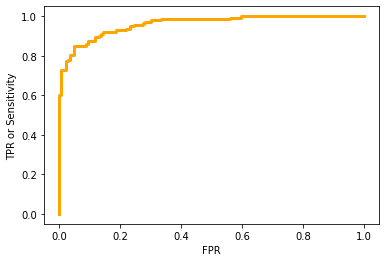

In [59]:
# roc curve 
fpr, tpr, _= roc_curve(y_val, probs)
plt.plot(fpr, tpr, color = 'orange', lw = 3)
plt.xlabel('FPR')
plt.ylabel('TPR or Sensitivity')

In [60]:
# AUC: higher the better
roc_auc_score(y_val,probs)

0.9619644418536869

## Crossvalidation Classification

In [61]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [62]:
from sklearn.utils import shuffle
# crossvalidation 
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits= 10, random_state= 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split, scoring = 'f1')
print(scores)
print('Mean f1 Scores', scores.mean())

[0.88721805 0.88727273 0.87142857 0.90714286 0.85818182 0.88405797
 0.86446886 0.85714286 0.89454545 0.85017422]
Mean f1 Scores 0.87616333823383


In [63]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
scores

array([-0.58333333, -0.11785113, -0.25      , -0.34359214, -0.46559985,
       -0.2508726 , -0.0836242 , -0.36450944, -0.64775028, -0.54194676])

In [64]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 9, scoring = 'neg_root_mean_squared_error')
scores

array([-0.56457949, -0.13693064, -0.29580399, -0.41208169, -0.34568317,
       -0.11215443, -0.13736056, -0.66351456, -0.57187763])

In [65]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 8, scoring = 'neg_root_mean_squared_error')
scores

array([-0.56273143, -0.1490712 , -0.3257994 , -0.47271946, -0.23635973,
       -0.        , -0.61180199, -0.58376547])

In [66]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 7, scoring = 'neg_root_mean_squared_error')
scores

array([-0.5454915 , -0.20952909, -0.40121766, -0.35613097, -0.12097168,
       -0.51796977, -0.61834694])

In [67]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 6, scoring = 'neg_root_mean_squared_error')
scores

array([-0.52550036, -0.27443361, -0.46644745, -0.22407411, -0.40910147,
       -0.6403451 ])

In [68]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 5, scoring = 'neg_root_mean_squared_error')
scores

array([-0.50087032, -0.35905412, -0.36863058, -0.27686649, -0.67160178])

In [69]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 4, scoring = 'neg_root_mean_squared_error')
scores

array([-0.51441613, -0.47500183, -0.22423053, -0.65373871])

In [70]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 3, scoring = 'neg_root_mean_squared_error')
scores

array([-0.52946646, -0.33920902, -0.60506924])

In [71]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 2, scoring = 'neg_root_mean_squared_error')
scores

array([-0.63046772, -0.64143319])

In [72]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
print (scores * -1)
print('Mean RMSE', scores.mean()*-1)

[0.58333333 0.11785113 0.25       0.34359214 0.46559985 0.2508726
 0.0836242  0.36450944 0.64775028 0.54194676]
Mean RMSE 0.36490797290288024


## KNN Model

In [73]:
# Importing KNN
from sklearn.neighbors import KNeighborsClassifier 

In [74]:
# Train the model
model = KNeighborsClassifier(n_neighbors= 11)
model.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=11)

In [75]:
# Train the model
model = KNeighborsClassifier(n_neighbors= 85)
model.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=85)

In [76]:
# Prediction
y_pred = model.predict(x_val_std)

In [77]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,140,6
1,31,110


In [78]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.8710801393728222
Recall 0.7801418439716312
Precision 0.9482758620689655
F1 Score 0.8560311284046693


## Crossvalidation KNN

In [79]:
# Crossvalidation
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits = 10, random_state = 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split, scoring = 'f1')
print(scores)
print('Mean f1 Score = ', scores.mean())

[0.86046512 0.85171103 0.81102362 0.84528302 0.82170543 0.83268482
 0.8125     0.74166667 0.83268482 0.7734375 ]
Mean f1 Score =  0.818316202663891


### Decision Tree Model

In [80]:
# importing decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state =0, max_depth= 4)
model.fit(x_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [81]:
# Export the decision tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file = 'tree.dot', impurity = True, filled = True, rounded = True, feature_names= x_train.columns[0 : 8],
                class_names = ['0', '1'])

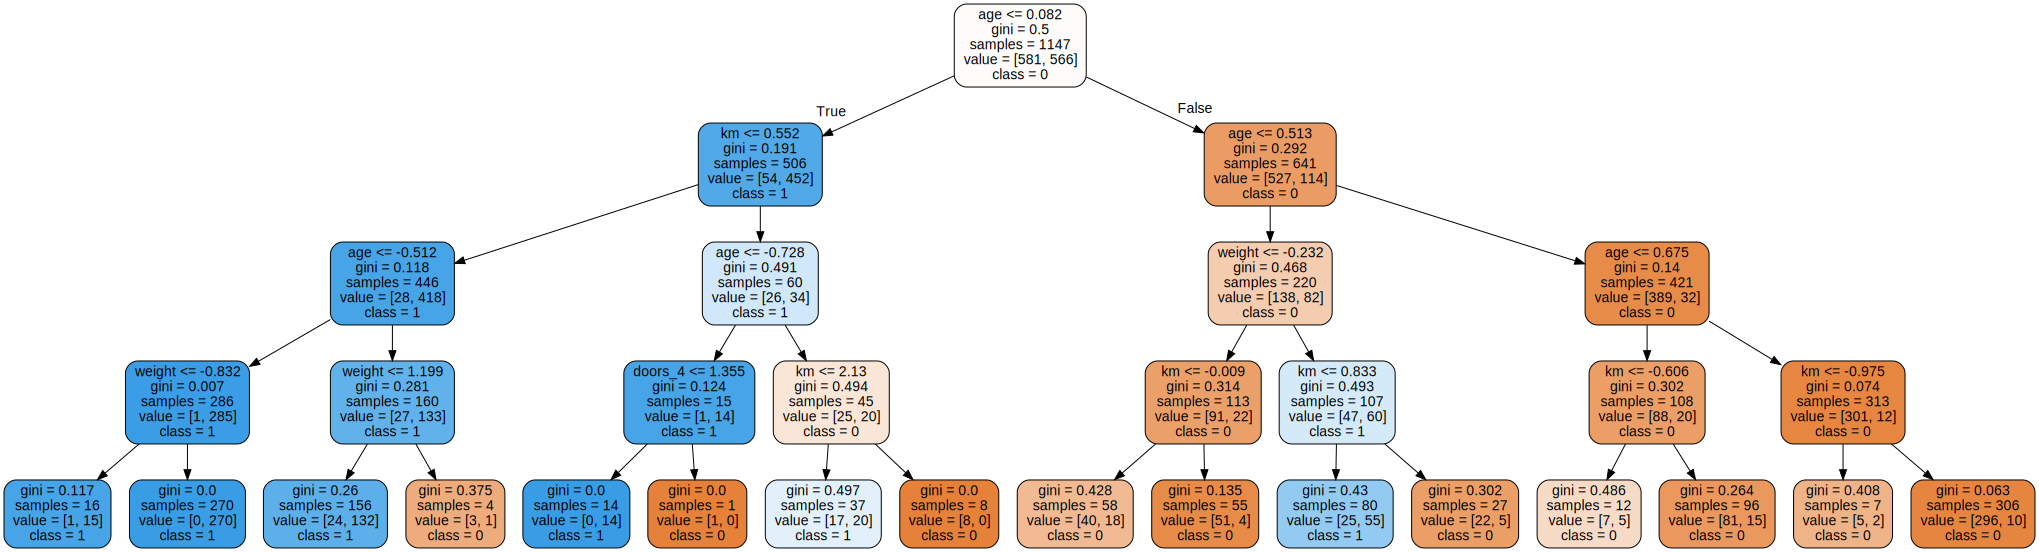

In [82]:
# plot the tree
import  graphviz 
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [83]:
# Prediction 
y_pred = model.predict(x_val_std)

In [84]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,133,13
1,16,125


In [85]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.8989547038327527
Recall 0.8865248226950354
Precision 0.9057971014492754
F1 Score 0.8960573476702509


## Crossvalidation Decision Tree model

In [86]:
# Crossvalidation
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits = 10, random_state = 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split, scoring = 'f1')
print(scores)
print('Mean f1 Score = ', scores.mean())

[0.89605735 0.83892617 0.86805556 0.88659794 0.84641638 0.87455197
 0.85714286 0.82685512 0.87455197 0.83687943]
Mean f1 Score =  0.8606034754213553


## Random Forest

In [88]:
# Import random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 1000, random_state=123, max_features=3)
model.fit(x_train , y_train)

RandomForestClassifier(max_features=3, n_estimators=1000, random_state=123)

In [89]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,133,13
1,16,125


In [90]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.8989547038327527
Recall 0.8865248226950354
Precision 0.9057971014492754
F1 Score 0.8960573476702509


In [91]:
# Import random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 1000, random_state=123, max_features=4)
model.fit(x_train , y_train)

RandomForestClassifier(max_features=4, n_estimators=1000, random_state=123)

In [93]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,133,13
1,16,125


In [94]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.8989547038327527
Recall 0.8865248226950354
Precision 0.9057971014492754
F1 Score 0.8960573476702509


In [92]:
# Import random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 1000, random_state=123, max_features=2)
model.fit(x_train , y_train)

RandomForestClassifier(max_features=2, n_estimators=1000, random_state=123)

In [95]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,133,13
1,16,125


In [96]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.8989547038327527
Recall 0.8865248226950354
Precision 0.9057971014492754
F1 Score 0.8960573476702509


Text(0.5, 0, 'Random Forest: Feature Importance')

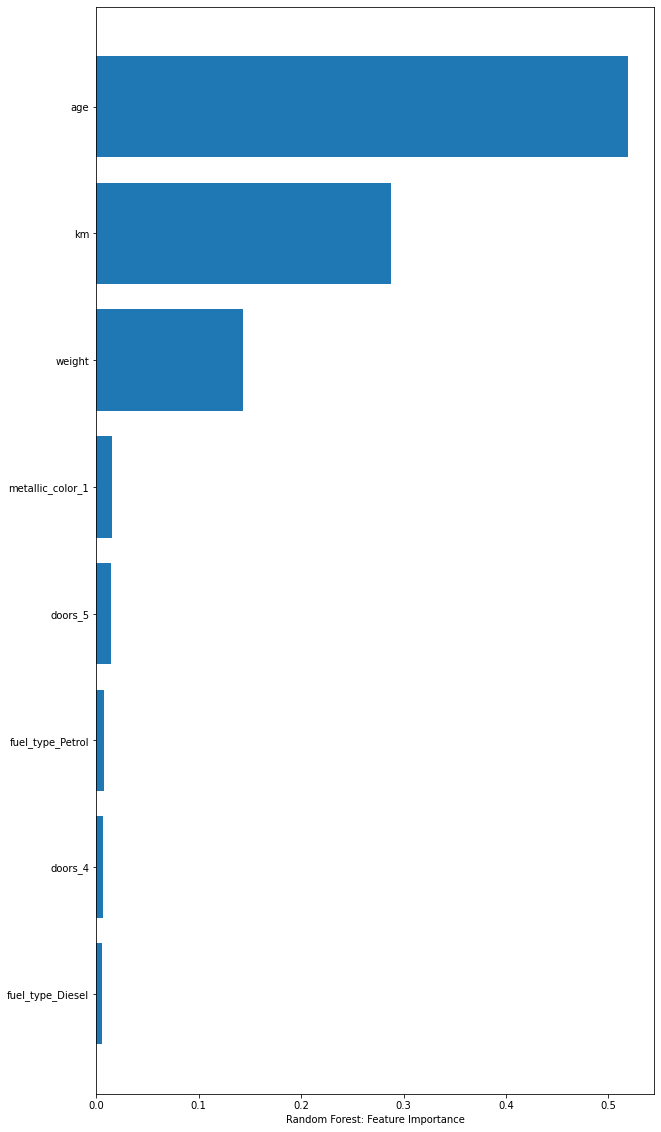

In [98]:
from IPython.core.pylabtools import figsize
# variable importance score
plt.figure(figsize=(10,20))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[0:][sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest: Feature Importance")

## XG Boost

In [99]:
# Import XG Boost
import xgboost as xgb

In [100]:
# train the model
model = xgb.XGBClassifier(objective= 'binary:logistic',
                          random_state= 123,
                          learning_rate= 0.15,
                          n_estimators= 1000,
                          max_depth= 4)
model.fit(x_train, y_train)

XGBClassifier(learning_rate=0.15, max_depth=4, n_estimators=1000,
              random_state=123)

In [102]:
# Prediction 
y_pred = model.predict(x_val)

In [103]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,136,10
1,19,122


In [104]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.8989547038327527
Recall 0.8652482269503546
Precision 0.9242424242424242
F1 Score 0.8937728937728938


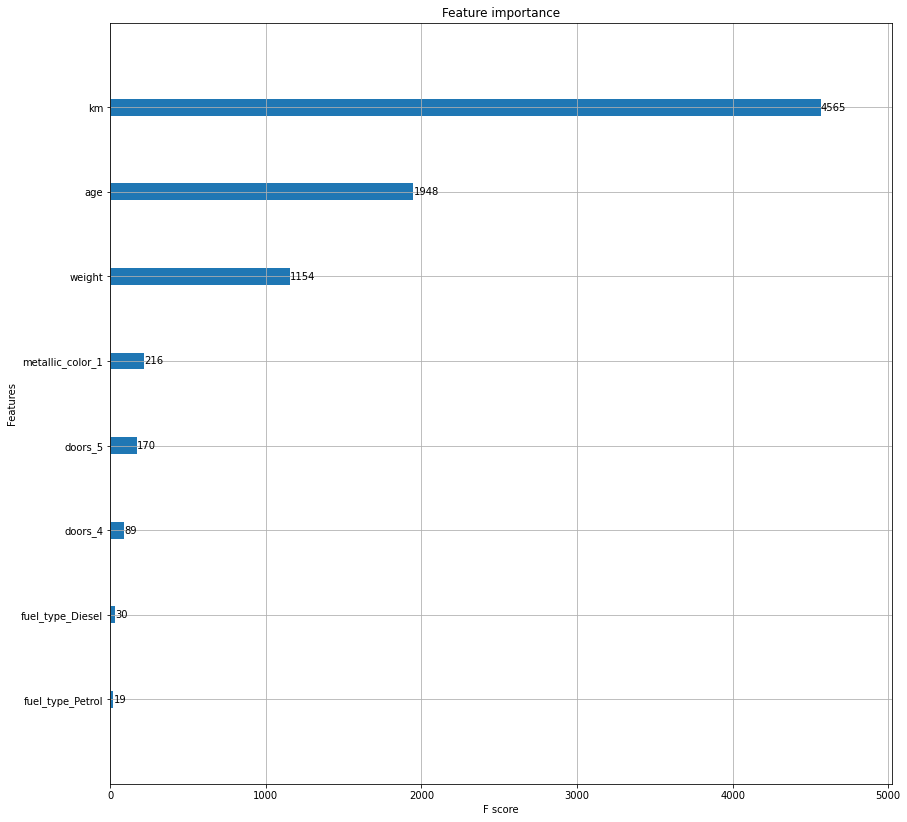

In [105]:
# plotting feature importance
plt.rcParams["figure.figsize"] = (14,14)
xgb.plot_importance(model)

## Import Auto-SKlearn


In [106]:
# importing auto-sklearn
import autosklearn
from autosklearn.classification import AutoSklearnClassifier

In [108]:
# define the model
TIME_BUDGET = 60*2
model = AutoSklearnClassifier(
        time_left_for_this_task=TIME_BUDGET,
        metric = autosklearn.metrics.roc_auc,
        n_jobs = -1,
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds': 5}
)

In [110]:
# train model
model.fit(x_train, y_train)

AutoSklearnClassifier(metric=roc_auc, n_jobs=-1, per_run_time_limit=24,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 5},
                      time_left_for_this_task=120)

In [111]:
# Prediction 
y_pred = model.predict(x_val)

In [112]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,138,8
1,23,118


In [113]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.89198606271777
Recall 0.8368794326241135
Precision 0.9365079365079365
F1 Score 0.8838951310861424


In [114]:
# Model Summary
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: 6402b938-1412-11ed-80c3-0242ac1c0002
  Metric: roc_auc
  Best validation score: 0.945132
  Number of target algorithm runs: 12
  Number of successful target algorithm runs: 8
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 0



In [115]:
# leaderboard summary
print(model.leaderboard())


          rank  ensemble_weight               type      cost   duration
model_id                                                               
9            1             0.18        extra_trees  0.054868  15.794160
10           2             0.26      random_forest  0.055755  18.920783
8            3             0.06  gradient_boosting  0.056535  10.409221
3            4             0.28      liblinear_svc  0.057305  11.692162
11           5             0.18                lda  0.058269  14.961099
2            6             0.04      random_forest  0.060168  22.197852
